<img src= "Images/DY_LOGO_BLACK.png">

<h1><center>Creative Asset Optimization Model</center></h1>

<a id='top'></a>
<h3>Purpose statement:</h3><br>

<center>Apply machine learning techniques on creative assets that will give deep insight into marketing's impact on business, learnings specific to digital media. Machine learning techniques include Optical Character Regonition (neural network), feature importance (random forest), KPI trends (linear regression), and distributed lag model (based on correlation coefficient delta over time).</center>

<h3>Contents:</h3>
<ul>
    <li><h4><a href='#section1'>Ad content (text analysis)</a></h4></li>
    <ul>
        <li><a href='#sub1'>OCR model</a></li>
        <li><a href='#sub2'>Creative text classifications</a></li>
        <li><a href='#sub3'>Creative Message Analysis</a></li>
    </ul>
    <li><h4><a href='#section2'>Ad visual assets (Google Oculi Project)</a></h4></li>
    <ul>
        <li><a href='#sub4'>visual asset detection</a></li>
        <li><a href='#sub5'>Visual asset analysis</a></li>
        <li><a href='#sub6'>Final Creative mapping Table</a></li>
    </ul>
    <li><h4><a href='#section3'>Data cleaning</a></h4></li>
    <ul>
        <li><a href='#sub7'>Raw data by placement ID & creative ID</a></li>
        <li><a href='#sub8'>Media and creative variable integration (joins on placement ID & creative ID)</a></li>
    </ul>
    <li><h4><a href='#section4'>Random forest feature importance</a></h4></li>
    <ul>
        <li><a href='#sub9'>Model by KPI to determine value of assets (creative and media) for each KPI</a></li>
        <li><a href='#sub10'>Feature selection - significant variable insights</a></li>
    </ul>
    <li><h4><a href='#section5'>KPI trends (interactive scatter plot with linear regression trends)</a></h4></li>
    <ul>
        <li><a href='#sub11'>Dynamic scatter plot (with linear regression)</a></li>
        <li><a href='#sub12'>KPI trend insights</a></li>
    </ul>
    <li><h4><a href='#section6'>Distributed lag time model</a></h4></li>
    <ul>
        <li><a href='#sub13'>Part 1: Brand impression to brand universal landing page lag</a></li>
        <li><a href='#sub14'>Part 2: Brand unverisal landing page to performance conversion lag</a></li>
        <li><a href='#sub15'>Lag time insights</a></li>
    </ul>
</ul>

___
<a id='section1'></a>
<h2><center>Creative Classification Methodology - Text</center></h2>

To streamline ad classification process Optical Character Recognition (OCR) was used to scrape text from digital creatives. Today OCR is widley used to gather information from printed paper documents such as passports, invoices, and checks. We applied the same methodology to digital ads resulting in a relatively accurate extraction of the creative message. Once text is extracted we will be able use creative map to map back creative message attributes to account performance. 
    To show how this process works sample script (pytesseract = OCR library) along with a few creative examples have been provided below. Creative image dropdown selection will result in displayed image and text extraction below (*text will usually show about 10 seconds after*).

<a id='sub1'></a>
<b>OCR script:</b>

In [75]:
###OCR Code Sample###
#first upload required libraries
import pytesseract
import os, cv2
from IPython.display import Image
from ipywidgets import interact, interact_manual

def image_ocr(image_path):
    #guide tesseract command (OCR - Optical Character Recognition) & read image as monochromatic
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract'
    img = cv2.imread(image_path, 0)

    #capture dimensions of image & establish counter at 0 (j)
    height, width = img.shape
    total_area = height * width

    #dynamic image resize (ideal to have larger but not that large)
    if total_area < 100000:
        temp_img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    else:
        temp_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    #grayscale thresholds that will create binary image (black & white)
    ret, temp_img = cv2.threshold(temp_img,150,255,cv2.THRESH_TOZERO)

    #extract text from image using pytesseract library
    text = pytesseract.image_to_string(temp_img, lang='eng')
    return text.replace('\n', ' ').replace('  ', ' ')

#pywidget interactive dropdown (with image file names)
@interact
def show_images(file=os.listdir('images/creatives/')):
    display(Image('images/creatives/'+file))
    return image_ocr('images/creatives/'+file)

interactive(children=(Dropdown(description='file', options=('HTML_IMAGE_107783967.jpg', 'HTML_IMAGE_107822776.…

<a id='sub2'></a>

Text assets uploaded into creative mapping table (by creative ID) including raw OCR, creative message (QAed OCR), and CTA (found within creative message). 
<br>
<img src = "images/DY_Creative.jpg" align="right" width="200">
<br>
<b>Text classifications sample:</b>
<table align=left>
  <tr>
    <th><center>Creative ID</center></th>
    <th><center>Raw OCR</center></th>
    <th><center>Creative Message</center></th>
    <th><center>CTA</center></th>
  </tr>
  <tr>
    <td><center>111469719</center></td>
    <td><center>DAVID YURMANN SHOP GIFTS</center></td>
    <td><center>DAVID YURMAN SHOP GIFTS</center></td>
    <td><center>SHOP GIFTS</center></td>
  </tr>
    <tr>
    <td><center>106581689</center></td>
    <td><center>DAVID YUR MAN SHOP NOW</center></td>
    <td><center>DAVID YURMAN SHOP NOW</center></td>
    <td><center>SHOP NOW</center></td>
  </tr>
    <tr bgcolor="#ffff66">
    <td><center>112556074</center></td>
    <td><center>DAVID YURMAN   EXPLORE MORE</center></td>
    <td><center>DAVID YURMAN EXPLORE MORE</center></td>
    <td><center>EXPLORE MORE</center></td>
  </tr>
    <tr>
    <td><center>108064307</center></td>
    <td><center>DAVID YURMAN DISCOVER WEDDING</center></td>
    <td><center>DAVID YURMAN DISCOVER WEDDING</center></td>
    <td><center>DISCOVER WEDDING</center></td>
  </tr>
</table>

<h3>Wordclouds - Creative Message Text Analysis:</h3>
<a id='sub3'></a>

In [70]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image as Im
import matplotlib.pyplot as plt
%matplotlib inline

@interact
def show_images(baseline=os.listdir('images/wordclouds/'), comparison=os.listdir('images/wordclouds/')):
    fig, ax = plt.subplots(1, 2, figsize=[15,10])
    
    pil_im = Im.open('images/wordclouds/'+baseline)
    plt.subplot(1,2, 1)
    plt.axis('off')
    plt.title(baseline.replace('.png', ''), fontsize='xx-large')
    plt.imshow(np.asarray(pil_im))
    
    pil_im2 = Im.open('images/wordclouds/'+comparison)
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title(comparison.replace('.png',''), fontsize='xx-large')
    plt.imshow(np.asarray(pil_im2))

interactive(children=(Dropdown(description='baseline', options=('CTR Holiday.png', 'CTR.png', 'CTR_Holiday_201…

<img src="Images/wordcloud_legend_v4.png" align="center">

__Wordcloud Insights:__
+ Wordclouds were evaluated using CTR, Universal Landing Page CVR (ULP) and sale CVR (CVR).
+ Size of words within wordcloud represent the frequency of word the word while color is factored by KPI performance (i.e. high CTR will be green)
+ Insights will focus on CTR for consideration/awareness KPI and CVR for low funnel intent (how well ad resonates with viewer)
    + CTR vs Holiday CTR:
        + During the holiday period the word 'holiday' appeared more often (note larger than holistic CTR wordcloud) and performed well at that time (green CTR)
        + The word 'now' does better year round than during the holiday season, instead of 'shop now' CTA should consider using 'shop gifts'
        + Location based words did poorly during the holiday period in comparison to whole year round (i.e. 'boston', 'chicago', 'locator', etc.)
        + CTR performance from word 'explore' not strong (later we will see brand segment does better with 'explore')
    + CVR vs Holiday CVR:
        + Urgency 'now' word performed poorly across CVR and CVR holiday wordclouds.
        + CVR Holiday had strong performance 

<a href='#top'>Top of Page</a>

___
<a id='section2'></a>
<h2><center>Creative Classification Methodology - Visuals</center></h2>

<img src = "images/DY_Visual_Assets_Example.jpg" align=right width=400>

<a id='sub4'></a>
Similar to text, visual assets need to be classified for every creative. Visual asset portion of image recognition will not be done in-house but instead will use Google Oculi's (based off Vision API) to streamline classification process of all historical creatives. Image detection software encompasses a large net that m/SIX will later need to QA and transform into helpful ad information. __An example of raw visual asset transformation can be seen here with creative id 108921862 that Google Oculi classified as Ring, Fashion accessory, Jewellery__. Later on our team would QA and format classifications as (*image on right*):
+ Theme = Product
+ Product = Ring
+ Product Count = 6
+ Product material = Gold, Black titanium, Carbon
+ Person = No
+ Background Color = Gray
+ Creative Audience = Men & Geographic-Atlanta

__Top Line Visual Asset Analysis:__
<a id='sub5'></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#read clean data (will show clean process after)
kpi_df = pd.read_csv('Data for charts/kpi_analysis_data.csv')
kpi_df = kpi_df.dropna(subset=['Theme','Campaign_Type'])
kpi_df = kpi_df[kpi_df['Theme'] != 'Other']

#create quarter column
kpi_df['Week'] = pd.to_datetime(kpi_df['Week'], format='%m/%d/%Y')
kpi_df = kpi_df[kpi_df['Week']>='2018-01-01']
kpi_df['Quarter'] = pd.PeriodIndex(kpi_df['Week'], freq='Q').astype(str)
q_list = list(kpi_df['Quarter'].unique())[:-1]
q_list.insert(0,'ALL')

#make group classifications for the material of products
kpi_df.loc[(kpi_df['Material'].str.contains('Gold, Silver')) | (kpi_df['Material'].str.contains('Silver, Gold')), 'Material'] = 'Silver & Gold'
kpi_df['Material Group'] = kpi_df['Material'].str.split(', ').str.get(0)
kpi_df.loc[(kpi_df['Material Group'].isin(['Beads', 'Aluminum', 'Turquoise'])), 'Material Group'] = 'Other'
kpi_df.loc[(kpi_df['Material Group'].isin(['Stainless Steel', 'Stainless Steal'])), 'Material Group'] = 'Stainless Steel'
kpi_df.loc[(kpi_df['Material Group'].isin(['Silver', 'Sterling silver', 'Sterling Silver'])), 'Material Group'] = 'Silver'
kpi_df = kpi_df.dropna(subset=['Material Group'])

kpi_df['Product Group'] = kpi_df['Product'].str.split(', ').str.get(0)
kpi_df.loc[(kpi_df['Product Group'].isin(['Cuff', 'Pen', 'Chain', 'Cuffs'])), 'Product Group'] = 'Other'
p_list = list(kpi_df['Product Group'].unique())
p_list.insert(0,'ALL')

#interactive dropdow
@interact
def bar_chart(quarter=q_list, kpi=['CTR', 'ULP', 'IVR', 'CVR'], segment=['Theme', 'Campaign_Type'], product=p_list, xaxis=['Product', 'Material Group', 'Product_Count', 'Background_Color']):   
    #break up into two side by side charts
    mpl.style.use('seaborn')
    fig,ax=plt.subplots(1, 2, figsize=[15,8])
    
    #dynamic kpi metrics & subsets
    scale = 'Visits' if kpi=='IVR' else 'Imp'
    y_label = 'Visits' if kpi=='IVR' else 'Impressions'
    if kpi=='IVR':
        kpi_g='I_Visits'
    elif kpi=='CTR':
        kpi_g='Clicks' 
    elif kpi=='ULP':
        kpi_g='LP_Conversions'
    else:
        kpi_g='Revenue'
    subset = ['Product', 'Lifestyle'] if segment == 'Theme' else ['Performance', 'Brand']
    
    #calc kpi across overall dataframe & find quantiles (for color effieciency later)
    kpi_df[kpi] = kpi_df[kpi_g]/kpi_df[scale]
    df= kpi_df[(kpi_df[scale] > 0) & (kpi_df[kpi_g] > 0)]
    df=df.replace(np.inf, np.nan)
    df = df.dropna(subset=[kpi])
    df = df if quarter == 'ALL' else df[df['Quarter']==quarter]
    df = df if product == 'ALL' else df[df['Product Group']==product]
    thresholds = df[kpi].quantile([.15,.45,.65, .75]).values

    #break up dataframe into two parts (one for each plot) and filter on quarter
    plot_df1 = df[df[segment]==subset[0]]
    plot_df2 = df[df[segment]==subset[1]]
    
    #group by xlabel for bar chart
    plot1_data = plot_df1.groupby([xaxis])[[scale,kpi_g]].sum().reset_index()
    plot2_data = plot_df2.groupby([xaxis])[[scale,kpi_g]].sum().reset_index()
    
    #calc kpi fields
    plot1_data[kpi] = plot1_data[kpi_g]/plot1_data[scale]
    plot2_data[kpi] = plot2_data[kpi_g]/plot2_data[scale]
    
    #convert dataframe to nested arrays (for visuals)
    plot1_values = plot1_data[scale].values
    plot1_labels = plot1_data[xaxis].values
    plot1_kpi = plot1_data[kpi].values
    
    plot2_values = plot2_data[scale].values
    plot2_labels = plot2_data[xaxis].values
    plot2_kpi = plot2_data[kpi].values
    
    #set up color map for two charts
    plot1_colors = []
    plot2_colors = []
    
    #input colors for first plot
    for i in range(0, len(plot1_kpi)):
        if plot1_kpi[i] <= thresholds[0]:
            plot1_colors.append('red')
        elif plot1_kpi[i] > thresholds[0] and plot1_kpi[i] <= thresholds[1]:
            plot1_colors.append('lightcoral')
        elif plot1_kpi[i] > thresholds[1] and plot1_kpi[i] <= thresholds[2]:
            plot1_colors.append('lightgreen')
        elif plot1_kpi[i] > thresholds[2] and plot1_kpi[i] <= thresholds[3]:
            plot1_colors.append('lime')
        else:
            plot1_colors.append('green')

    #input colors for second plot
    for i in range(0, len(plot2_kpi)):
        if plot2_kpi[i] <= thresholds[0]:
            plot2_colors.append('red')
        elif plot2_kpi[i] > thresholds[0] and plot2_kpi[i] <= thresholds[1]:
            plot2_colors.append('lightcoral')
        elif plot2_kpi[i] > thresholds[1] and plot2_kpi[i] <= thresholds[2]:
            plot2_colors.append('lightgreen')
        elif plot2_kpi[i] > thresholds[2] and plot2_kpi[i] <= thresholds[3]:
            plot2_colors.append('lime')
        else:
            plot2_colors.append('green')
            
    #create first plot 
    plt.subplot(1,2, 1)
    plt.title('DY Digital '+subset[0]+': '+kpi, family='serif', fontsize='xx-large')
    plt.ylabel(y_label, family='serif', fontsize='x-large')
    plt.bar(range(0, len(plot1_values)), plot1_values, color=plot1_colors, align='center')
    plt.xticks(range(0, len(plot1_labels)), plot1_labels, rotation=90, family='serif',fontsize='large')
    plt.tight_layout()
    
    #second plot
    plt.subplot(1,2, 2)
    plt.title('DY Digital '+subset[1]+': '+kpi, family='serif', fontsize='xx-large')
    plt.ylabel(y_label, family='serif', fontsize='x-large')
    plt.bar(range(0, len(plot2_values)), plot2_values, color=plot2_colors, align='center')
    plt.xticks(range(0, len(plot2_labels)), plot2_labels, rotation=90, family='serif',fontsize='large')
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='quarter', options=('ALL', '2018Q1', '2018Q2', '2018Q3', '2018Q4', …

__Visual Overview:__
+ stuff


<a href='#top'>Top of Page</a>
___
<a id='sub6'></a>
<h3><center>Creative Mapping Table Output (Text & Visuals)</center></h3>

In [35]:
#python script to upload excel file and print (with pandas)
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#read file using pandas
cmap_df = pd.read_csv('Mapping Tables/DY_Creative_Map.csv')

@interact
def show_articles_more_than(column='creative_id', x=(70000000, 114801713, 1)):
    return cmap_df.loc[cmap_df[column] > x]

interactive(children=(Text(value='creative_id', description='column'), IntSlider(value=92400856, description='…

___
<a id='section3'></a>
<h2><center>David Yurman - Performance Data (1/2017 - 4/2019)</center></h2>

<img src = "Images/join_datasets.png" align = "right"> Next performance data must be cleaned and joined back to creative classifications so KPI performance can be tied back to creative assets. A few things to keep top of mind for interpreting performance:
+ Identify KPIs (such as CTR, site visits, and digital conversions)
+ Data will need to be aggregated so it can be used to derive business insights
+ Will need some sort of time series for seasonality
+ Identify a way to join creative map to performance data (creative id/key)

<a id='sub7'></a>
__Sample of performance dataset__:

In [37]:
#import pandas to upload excel
import pandas as pd

#read and print DY performance dataframe (export from Datorama)
dy_df = pd.read_csv('Data for charts/Performance by Day (Sample).csv')
dy_df.head(5)

,Day,Media Buy Key,Media Buy Name,Creative Key,Creative Name,Planned Spend Creative Daily,Cross Channel Impressions,Cross Channel Clicks,Visits,Interested Visits,Total Orders,m_Revenue
0,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76602700,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v1,0.0,0,0,0,0,0,0.0
1,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76599975,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v2,0.0,0,0,0,0,0,0.0
2,1/1/2017,10942595,PCKXGD_DAV_WED_101_Audience_XAXIS_DMT_1 x 1_pe...,76597882,DavidYurman_15sec_FINAL_compressed (2) v2,0.0,0,0,0,0,1,395.0
3,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76598878,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v1,0.0,0,0,0,0,0,0.0
4,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76597883,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v2,0.0,0,0,0,0,1,325.0


<a id='sub8'></a>
__Join Creative Map to Performance dataset:__

In [16]:
#read creative map
cmap = pd.read_csv('Mapping Tables/DY_Creative_Map.csv')

#prep join (make sure datatypes are aligned)
dy_df['Creative Key'] = dy_df['Creative Key'].astype(str)
cmap['creative_id'] = cmap['creative_id'].astype(str)

#join previous creative map to previous performance data
dy_df_creative = pd.merge(dy_df,
                         cmap[['creative_id', 'Background_Color', 'Product']],
                         left_on='Creative Key',
                         right_on='creative_id',
                         how='left')

#performance data with creative classifications
dy_df_creative.head(5)

,Day,Media Buy Key,Media Buy Name,Creative Key,Creative Name,Planned Spend Creative Daily,Cross Channel Impressions,Cross Channel Clicks,Visits,Interested Visits,Total Orders,m_Revenue,creative_id,Background_Color,Product
0,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76602700,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v1,0.0,0,0,0,0,0,0.0,76602700,White,Ring
1,1/1/2017,10942589,PCKXG6_DAV_WED_101_Mobile_WHO WHAT WEAR_MOB_32...,76599975,FW16_WEDDING_RINGS_BP_EXPLORE_320X480_v2,0.0,0,0,0,0,0,0.0,76599975,White,Ring
2,1/1/2017,10942595,PCKXGD_DAV_WED_101_Audience_XAXIS_DMT_1 x 1_pe...,76597882,DavidYurman_15sec_FINAL_compressed (2) v2,0.0,0,0,0,0,1,395.0,76597882,Black/White,Ring
3,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76598878,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v1,0.0,0,0,0,0,0,0.0,76598878,White,Ring
4,1/1/2017,10942597,PCKXGG_DAV_WED_101_Audience_XAXIS_DMT_728x90_C...,76597883,FW16_WEDDING_RINGS_BP_EXPLORE_728x90 v2,0.0,0,0,0,0,1,325.0,76597883,White,Ring


<a href='#top'>Top of Page</a>
___
<a id='section4'></a>
<h2><center>Random Forest Model - Feature Importance</center></h2>
<b>Purpose statement:</b> To find variables with a strong relationship to KPI performance (CTR, IVR, CVR). This will assit in assigning relavence to creative assets by each KPI.

<b>Model Description:</b>
As name suggests random forests are a collection of decision trees used to predict values. Due to transparency of random forest models (with each tree making feature/variable decisions) it is easy to extract feature importance to find which variables were larger contributors to predictive model.
    
<b>Random Forest Model (Python script) below:</b>

In [31]:
#random forest model - part 1

#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
%matplotlib inline 

#import media data into dataframes (join to QSI dataset later)
dy_df = pd.read_csv('data for charts/dy_creative_feature_select.csv')

#index last x variable column (where y index starts)
ctr_index = len(dy_df.columns)-4
cvr_index = len(dy_df.columns)-3

#convert OCR accuracy in dataframe from float to integer
dy_df["OCR_Accuracy"] = round(dy_df["OCR_Accuracy"] * 100, 0)
dy_df["OCR_Accuracy"] = dy_df["OCR_Accuracy"].astype(int)

# dy_df['Week'] = pd.to_datetime(dy_df['Week'], format='%m/%d/%Y')
# dy_df = dy_df[dy_df['Week'] >= '2018-12-30']

In [32]:
#random forest model - part 2

#take out na's from ivr and cpr (cvr) dataframes (seperate models)
dy_df = dy_df.replace(np.inf, np.nan)

dy_df_ivr = dy_df.dropna(subset=['IVR'])
dy_df_ivr = dy_df_ivr.reindex()

dy_df_cpr = dy_df.dropna(subset=['CPR'])
dy_df_cpr = dy_df_cpr.reindex()

#break up x variables in two parts (first part is categorical and second part is numeric)
x_ctr_p1 = dy_df.iloc[:, 0:13]
x_ctr_p2 = dy_df.iloc[:, 13:16]

x_ivr_p1 = dy_df_ivr.iloc[:, 0:13]
x_ivr_p2 = dy_df_ivr.iloc[:, 13:16]

x_cpr_p1 = dy_df_cpr.iloc[:, 0:13]
x_cpr_p2 = dy_df_cpr.iloc[:, 13:17]

#set x and y values for model (convert categorical to numeric with labelencoder model)
x_ctr = pd.concat([x_ctr_p1.apply(LabelEncoder().fit_transform), x_ctr_p2], axis=1).values
dy_df["CTR"] = round(dy_df["CTR"] * 10000, 0)
y_ctr = dy_df["CTR"].astype(int).values

x_ivr = pd.concat([x_ivr_p1.apply(LabelEncoder().fit_transform), x_ivr_p2], axis=1).values
dy_df_ivr["IVR"] = round(dy_df_ivr["IVR"] * 1000, 0)
y_ivr = dy_df_ivr["IVR"].astype(int).values

x_cpr = pd.concat([x_cpr_p1.apply(LabelEncoder().fit_transform), x_cpr_p2], axis=1).values
dy_df_cpr["CPR"] = round(dy_df_cpr["CPR"] * 10000, 0)
y_cpr = dy_df_cpr["CPR"].astype(int).values

#grab column names
feat_labels = dy_df.columns[0:ctr_index]
feat_labels_2 = dy_df_ivr.columns[0:cvr_index]

#split into test and train datasets (1.CTR   2.IVR   3.CPR)
x_ctr_tr, x_ctr_ts, y_ctr_tr, y_ctr_ts = train_test_split(x_ctr, y_ctr, test_size=0.1, random_state=0)
x_ivr_tr, x_ivr_ts, y_ivr_tr, y_ivr_ts = train_test_split(x_ivr, y_ivr, test_size=0.1, random_state=0)
x_cpr_tr, x_cpr_ts, y_cpr_tr, y_cpr_ts = train_test_split(x_cpr, y_cpr, test_size=0.1, random_state=0)

#create random forest object (3 models - CTR, IVR, CPR)
ctr_forest = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0, n_jobs=-1)
ctr_forest.fit(x_ctr_tr, y_ctr_tr)

ivr_forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
ivr_forest.fit(x_ivr_tr, y_ivr_tr)

cpr_forest = RandomForestRegressor(n_estimators=100, max_depth=22, random_state=0, n_jobs=-1)
cpr_forest.fit(x_cpr_tr, y_cpr_tr)

#grab important feature list from each model (deciding factors in random forest)
ctr_importances = ctr_forest.feature_importances_
ctr_indices = np.argsort(ctr_importances)[::-1]

ivr_importances = ivr_forest.feature_importances_
ivr_indices = np.argsort(ivr_importances)[::-1]

cpr_importances = cpr_forest.feature_importances_
cpr_indices = np.argsort(cpr_importances)[::-1]

#set up arrays where top results will append
ctr_labels = []
ctr_important = []

ivr_labels = []
ivr_important = []

cpr_labels = []
cpr_important = []

#append top important features (with labels)
for f in range(0,16):
    ctr_labels.append(feat_labels[ctr_indices[f]])
    ctr_important.append(ctr_importances[ctr_indices[f]])
    ivr_labels.append(feat_labels_2[ivr_indices[f]])
    ivr_important.append(ivr_importances[ivr_indices[f]])

for f in range(0,17):
    cpr_labels.append(feat_labels_2[cpr_indices[f]])
    cpr_important.append(cpr_importances[cpr_indices[f]])
    
#prediction values from random forest models
CTR_predict_test = ctr_forest.predict(x_ctr_ts)
IVR_predict_test = ivr_forest.predict(x_ivr_ts)
CPR_predict_test = cpr_forest.predict(x_cpr_ts)

CTR_predict_train = ctr_forest.predict(x_ctr_tr)
IVR_predict_train = ivr_forest.predict(x_ivr_tr)
CPR_predict_train = cpr_forest.predict(x_cpr_tr)

#find variance score (variance of actuals vs predicitons based on models)
variance_scores = []

variance_scores.append(explained_variance_score(y_ctr_tr, CTR_predict_train))
variance_scores.append(explained_variance_score(y_ctr_ts, CTR_predict_test))
variance_scores.append(explained_variance_score(y_ivr_tr, IVR_predict_train))
variance_scores.append(explained_variance_score(y_ivr_ts, IVR_predict_test))
variance_scores.append(explained_variance_score(y_cpr_tr, CPR_predict_train))
variance_scores.append(explained_variance_score(y_cpr_ts, CPR_predict_test))

#will input all variance scores into table
table_data = np.reshape(variance_scores, (3,2))

<a id='sub9'></a>
<b>Random Forest Model Visualizations (CTR, IVR, CVR):</b>

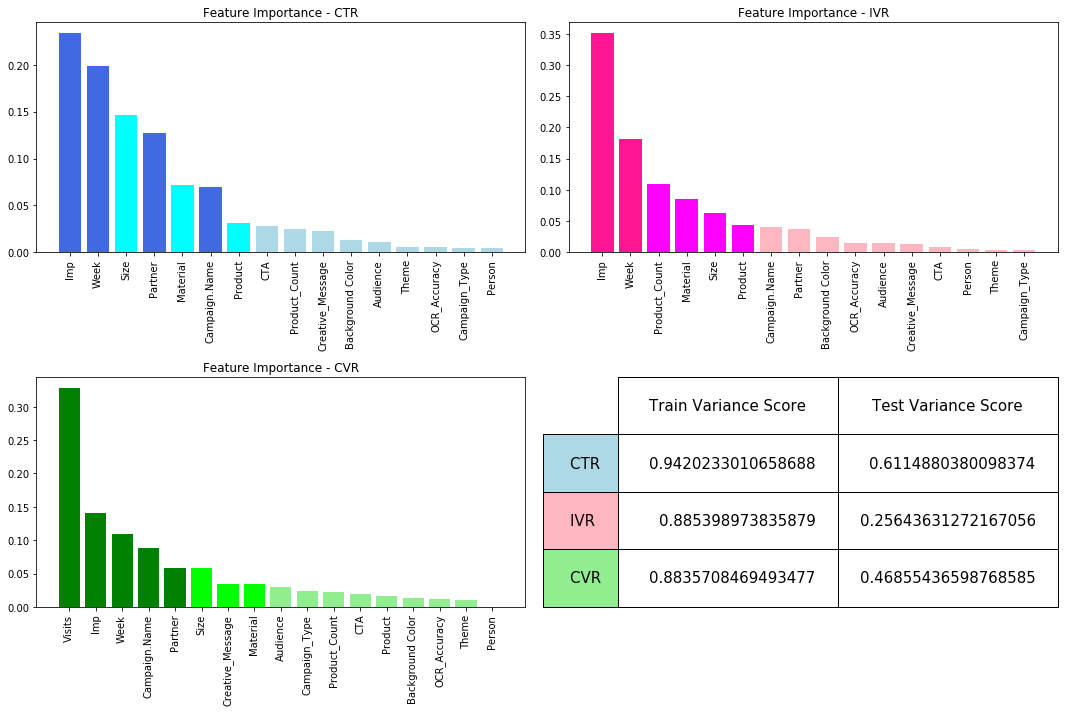

In [41]:
%matplotlib inline
#plot charts from feature importance analysis
fig,ax=plt.subplots(2, 2, figsize=[15,10])

#set up creative feature list and blank color maps
creative_features = ['Material', 'Product', 'CTA', 'Product_Count', 'Creative_Message', 'Background Color', 'Audience', 'Size']
ctr_colors = []
ivr_colors = []
cvr_colors = []

for i in range(0, len(ctr_important)):
    if ctr_important[i] > 0.03 and ctr_labels[i] in creative_features:
        ctr_colors.append('cyan')
    elif ctr_important[i] > 0.05 and ctr_labels not in creative_features:
        ctr_colors.append('royalblue')
    else:
        ctr_colors.append('lightblue')

plt.subplot(2,2, 1)
plt.title('Feature Importance - CTR')
plt.bar(range(0, 16), ctr_important, color=ctr_colors, align='center')
plt.xticks(range(0, 16), ctr_labels, rotation=90)
plt.tight_layout()


for i in range(0, len(ivr_important)):
    if ivr_important[i] > 0.03 and ivr_labels[i] in creative_features:
        ivr_colors.append('magenta')
    elif ivr_important[i] > 0.05 and ivr_labels not in creative_features:
        ivr_colors.append('deeppink')
    else:
        ivr_colors.append('lightpink')

plt.subplot(2,2, 2)
plt.title('Feature Importance - IVR')
plt.bar(range(0, 16), ivr_important, color=ivr_colors, align='center')
plt.xticks(range(0, 16), ivr_labels, rotation=90)
plt.tight_layout()

for i in range(0, len(cpr_important)):
    if cpr_important[i] > 0.03 and cpr_labels[i] in creative_features:
        cvr_colors.append('lime')
    elif cpr_important[i] > 0.05 and cpr_labels not in creative_features:
        cvr_colors.append('green')
    else:
        cvr_colors.append('lightgreen')

plt.subplot(2,2, 3)
plt.title('Feature Importance - CVR')
plt.bar(range(0, 17), cpr_important, color=cvr_colors, align='center')
plt.xticks(range(0, 17), cpr_labels, rotation=90)
plt.tight_layout()

plt.subplot(2,2, 4)
plt.title('')
plt.axis('off')
the_table = plt.table(cellText=table_data,
          rowLabels = ('    CTR ', '    IVR ', '    CVR '),
          rowColours=('lightblue', 'lightpink', 'lightgreen'),
          colLabels=('Train Variance Score', 'Test Variance Score',''),
         bbox = [0.1, 0, .9, 1])
the_table.set_fontsize(20)
plt.tight_layout()
plt.show()

<a id='sub10'></a> 
__Feature Importance Insights__:
+ Random forest feature importance highlights significant variables by utilizing the nature of decision tree models. Since a collection of decisions trees make up a random forest the feature importance can be described as the factor of decisions made while training the model. Each model will try to predict KPI output, accuracy captured in table with varaince score, using all variables from digital data. High score features are variables that make more decisions for a KPI output (note feature importance totals 1 across all variables which amounts to 100% of decisions). Visual details include:
    + CTR features (blue)
        + *Dark Blue = High value media | Cyan = High value creative | Light Blue = Low value*
    + IVR features (pink)
        + *Dark Pink = High value media | Bright Pink = High value creative | Light Pink = Low value*
    + CVR features (green)
        + *Dark Green = High value media | Lime = High value creative | Light green = Low value*
+ All models had accurate training variance scores with relatively low test scores, a sign of overfitted models (common in decision tree analyses). While these models are not ideal for predictions they can still be used to better understand value of variables within the models.
    + Feature importance is great for transparency (eliminates black box that comes with many predictive models)
    + Low test scores suggest these models are not best suited for predicting future output

<a href='#top'>Top of Page</a>

___
<a id='section5'></a>
<h2><center>KPI Analysis</center></h2>

Key Performance Indicator (KPI) analysis will use trends from input (x) against output (y) that can be used to find patterns at various account segments such as Brand vs Performance. Linear trends will be based off numerous data points that are illustrated in scatter plot below. Colors will represent categories such as theme (product & lifestyle), campaign type (brand & performance) and creative audience (women, men, wedding, etc.).

<a id='sub11'></a>

In [74]:
import cufflinks as cf
from scipy import stats
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#establish plotly api (for visuals) and dataframe (for analysis)
plotly.tools.set_credentials_file(username='benjamin4289', api_key='aqZG6eMc120RTO037txd')

#read and clean up dataframe from csv file
kpi_df = pd.read_csv('Data for charts/kpi_analysis_data.csv')
kpi_df = kpi_df.dropna(subset=['Campaign_Type', 'Theme', 'Audience'])
kpi_df = kpi_df[kpi_df['Theme'] != 'Other']
kpi_df['Week'] = pd.to_datetime(kpi_df['Week'], format='%m/%d/%Y')
kpi_df = kpi_df[kpi_df['Week']>='2018-01-01']
kpi_df['Quarter'] = pd.PeriodIndex(kpi_df['Week'], freq='Q').astype(str)
q_list = list(kpi_df['Quarter'].unique())[:-1]
q_list.insert(0,'ALL')

#interactive dropdowns
@interact
def scatter_plot(x=list(kpi_df.select_dtypes('number').columns), y=list(kpi_df.select_dtypes('number').columns)[1:], breakout=['Campaign_Type', 'Theme', 'Creative_Audience'], annotations=['CTA', 'Product', 'Product_Count', 'Material', 'Partner', 'Week'], quarter=q_list):   
    #take out outliers
    df = kpi_df
    thresholds = df[x].quantile([.45,.998])
    df = df.dropna(subset=[y])
    df = df if quarter == 'ALL' else df[df['Quarter'] == quarter]

    visual_df = df[(df[x] >= min(thresholds)) & (df[x] <= max(thresholds))]
    #visual_df = visual_df[(visual_df[y] >= min(yt)) & (visual_df[y] <= max(yt))]
    visual_data = []
    colors = ['blue', 'lightblue', 'red', 'coral', 'green', 'lightgreen', 'deeppink', 'lightpink', 'darkturquoise', 'turquoise', 'violet', 'mediumpurple']
    k=0
    for i in visual_df[breakout].unique():
        temp_df = visual_df[visual_df[breakout] == i]
        slope, intercept, r_value, p_value, std_err = stats.linregress(temp_df[x].values,temp_df[y].values)
        str_line= str(round(slope,6))+'*x+'+str(round(intercept, 2))
        line = slope*temp_df[x].values+intercept
        visual_data.append(go.Scatter(x = temp_df[x].values, y = line, mode = 'lines', name = i+' Trends', text='Formula = '+str(str_line), marker=dict(size = 5, color=colors[k])))
        visual_data.append(go.Scatter(x = temp_df[x].values, y = temp_df[y].values, mode = 'markers', text=temp_df[annotations].values, name = i, marker=dict(size=5, color=colors[(k+1)])))
        k+=2
    layout = go.Layout(title=go.layout.Title(text=x+' v '+y),  yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text=y)), xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text=x)))
    fig = go.Figure(data=visual_data, layout=layout)
    return py.iplot(fig)

interactive(children=(Dropdown(description='x', options=('Imp', 'Clicks', 'LP_Conversions', 'Visits', 'I_Visit…

<a id='sub12'></a>
<b>KPI Trend Insights:</b>
<ul>
    <li>Impressions v Clicks</li>
    <ul>
        <li>Campaign Insights</li>
        <li>Theme Insights</li>
        <li>Audience Insights</li>
    </ul>
    <li>Impressions v Universal Landing Pages</li>
    <ul>
        <li>Campaign Insights</li>
        <li>Theme Insights</li>
        <li>Audience Insights</li>
    </ul>
    <li>Visits v Interested Visits</li>
    <ul>
        <li>Campaign Insights</li>
        <li>Theme Insights</li>
        <li>Audience Insights</li>
    </ul>
    <li>Impressions v Revenue (conversions)</li>
    <ul>
        <li>Campaign Insights</li>
        <li>Theme Insights</li>
        <li>Audience Insights</li>
    </ul>
</ul>

<a href='#top'>Top of Page</a>
___
<a id='section'></a>
<br>
<h3><center>Lag Time Analysis: Brand Campaigns Ripple Effect on Performance Campaign Conversions</center></h3>

<b>Purpose Statement:</b> To understand how brand media effects bottom line KPIs attributed to performance media using lag time correlation between the two campaign types.

<b>Campaign Type Description:</b>
+ Brand - Investment related to current promotional period; examples include Valentine's Day, EOY holidays, Mother's Day, Father's Day, etc.
+ Performance - Evergreen campaigns, live entire year (including promotional period), that serve a more holistic audience, but can be specific to men, women or weddings. Performance campaigns will typically focus on CTAs that result in majority of bottom line conversions (revenue) although investment is actually less than Brand campaign.

<b>Distributed lag model (Python script) below:</b>

In [14]:
#### LAG TIME ANALYSIS INCLUDES TWO PARTS ####
#1) Brand Impressions vs Landing Pages (universal LP floodlight)
#2) Brand Landing Pages vs Performance Revenue (floodlight conversion)

#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#read csv file
brand_df = pd.read_csv('C:/Users/benjamin.may/Desktop/David Yurman/Lag time analysis/Lag_time_python_TimeSeries.csv')

#select impressions and revenue metrics & normalize (will set up date difference)
brand_top = brand_df[["Brand_Imp", "Brand_LP"]] #set up basic dataframe for part 1
brand_v_performance = brand_df[["Brand_LP", "Performance_Revenue"]] #set up basic dataframe part 2

#call preprocessing minimum - maximum scaler
mms = MinMaxScaler() #mms will be used on arrays in dataframes to make values from 0-1 (max=1, min=0)
brand_top_norm = mms.fit_transform(brand_top.values.astype(float)) #normalize values for part 1 dataframe
per_norm = mms.fit_transform(brand_v_performance.values.astype(float)) #normalize values for part 2 dataframe

#set up blank array ([]), counter (k), and length of array
brand_lag = []
k = 0
rowcount = len(brand_top_norm) #can be used for part 1 and 2 since lenth is the same (both come from 1 dataframe)

#set up 25+ day lag time on brand metrics (and performance revenue)
for i in brand_top_norm:
    day_1 = k+1 if k < rowcount-1 else None
    day_2 = k+2 if k < rowcount-2 else None
    day_3 = k+3 if k < rowcount-3 else None
    day_4 = k+4 if k < rowcount-4 else None
    day_5 = k+5 if k < rowcount-5 else None
    day_6 = k+6 if k < rowcount-6 else None
    day_7 = k+7 if k < rowcount-7 else None
    day_8 = k+8 if k < rowcount-8 else None
    day_9 = k+9 if k < rowcount-9 else None
    day_10 = k+10 if k < rowcount-10 else None
    day_11 = k+11 if k < rowcount-11 else None
    day_12 = k+12 if k < rowcount-12 else None
    day_13 = k+13 if k < rowcount-13 else None
    day_14 = k+14 if k < rowcount-14 else None
    day_15 = k+15 if k < rowcount-15 else None
    day_16 = k+16 if k < rowcount-16 else None
    day_17 = k+17 if k < rowcount-17 else None
    day_18 = k+18 if k < rowcount-18 else None
    day_19 = k+19 if k < rowcount-19 else None
    day_20 = k+20 if k < rowcount-20 else None
    day_21 = k+21 if k < rowcount-21 else None
    day_22 = k+22 if k < rowcount-22 else None
    day_23 = k+23 if k < rowcount-23 else None
    day_24 = k+24 if k < rowcount-24 else None
    day_25 = k+25 if k < rowcount-25 else None

    #create dictionary within blank array
    brand_lag.append({
        'Brand Imp': i[0], 
        'Brand LP': i[1],
        'Performance Revenue': per_norm[k,1],
        'Brand LP - 1 Day': brand_top_norm[day_1, 1],
        'Brand LP - 2 Day': brand_top_norm[day_2, 1],
        'Brand LP - 3 Day': brand_top_norm[day_3, 1],
        'Brand LP - 4 Day': brand_top_norm[day_4, 1],
        'Brand LP - 5 Day': brand_top_norm[day_5, 1],
        'Brand LP - 6 Day': brand_top_norm[day_6, 1],
        'Brand LP - 7 Day': brand_top_norm[day_7, 1],
        'Brand LP - 8 Day': brand_top_norm[day_8, 1],
        'Brand LP - 9 Day': brand_top_norm[day_9, 1],
        'Brand LP - 10 Day': brand_top_norm[day_10, 1],
        'Brand LP - 11 Day': brand_top_norm[day_11, 1],
        'Brand LP - 12 Day': brand_top_norm[day_12, 1],
        'Brand LP - 13 Day': brand_top_norm[day_13, 1],
        'Brand LP - 14 Day': brand_top_norm[day_14, 1],
        'Brand LP - 15 Day': brand_top_norm[day_15, 1],
        'Brand LP - 16 Day': brand_top_norm[day_16, 1],
        'Brand LP - 17 Day': brand_top_norm[day_17, 1],
        'Brand LP - 18 Day': brand_top_norm[day_18, 1],
        'Brand LP - 19 Day': brand_top_norm[day_19, 1],
        'Brand LP - 20 Day': brand_top_norm[day_20, 1],
        'Brand LP - 21 Day': brand_top_norm[day_21, 1],
        'Brand LP - 22 Day': brand_top_norm[day_22, 1],
        'Brand LP - 23 Day': brand_top_norm[day_23, 1],
        'Brand LP - 24 Day': brand_top_norm[day_24, 1],
        'Brand LP - 25 Day': brand_top_norm[day_25, 1],
        'Performance Rev - 1 Day': per_norm[day_1, 1],
        'Performance Rev - 2 Day': per_norm[day_2, 1],
        'Performance Rev - 3 Day': per_norm[day_3, 1],
        'Performance Rev - 4 Day': per_norm[day_4, 1],
        'Performance Rev - 5 Day': per_norm[day_5, 1],
        'Performance Rev - 6 Day': per_norm[day_6, 1],
        'Performance Rev - 7 Day': per_norm[day_7, 1],
        'Performance Rev - 8 Day': per_norm[day_8, 1],
        'Performance Rev - 9 Day': per_norm[day_9, 1],
        'Performance Rev - 10 Day': per_norm[day_10, 1],
        'Performance Rev - 11 Day': per_norm[day_11, 1],
        'Performance Rev - 12 Day': per_norm[day_12, 1],
        'Performance Rev - 13 Day': per_norm[day_13, 1],
        'Performance Rev - 14 Day': per_norm[day_14, 1],
        'Performance Rev - 15 Day': per_norm[day_15, 1],
        'Performance Rev - 16 Day': per_norm[day_16, 1],
        'Performance Rev - 17 Day': per_norm[day_17, 1],
        'Performance Rev - 18 Day': per_norm[day_18, 1],
        'Performance Rev - 19 Day': per_norm[day_19, 1],
        'Performance Rev - 20 Day': per_norm[day_20, 1],
        'Performance Rev - 21 Day': per_norm[day_21, 1],
        'Performance Rev - 22 Day': per_norm[day_22, 1],
        'Performance Rev - 23 Day': per_norm[day_23, 1],
        'Performance Rev - 24 Day': per_norm[day_24, 1],
        'Performance Rev - 25 Day': per_norm[day_25, 1]
    })
    k +=1

#convert dictionary into dataframe & cut rows (depends on)
lag_df = pd.DataFrame(brand_lag, columns=brand_lag[0].keys())
lag_df = lag_df[:-25]

#drop any na's and convert column datatypes to float (so correl will work)
lag_df = lag_df.dropna()
lag_df = lag_df[lag_df.columns].astype(float)

#empty correl dataset
brand_correl = []
perf_correl = []
lag_columns = lag_df.columns

#loop through all columns in dataframe for correlation analysis
k = 0
j = 0
for i in lag_columns:
    if 'Brand LP' in i: #part 1 dictionary
        if j > 0:
            brand_correl.append({
                'Analysis': i.replace('Brand LP - ', ''),
                'Cross_Correl': np.correlate(lag_df["Brand Imp"], lag_df[i])[0],
                'Correl_Coef': np.corrcoef(lag_df["Brand Imp"], lag_df[i])[0][1]
            })
        else:
            brand_correl.append({
            'Analysis': 'Exact Day',
            'Cross_Correl': np.correlate(lag_df["Brand Imp"], lag_df[i])[0],
            'Correl_Coef': np.corrcoef(lag_df["Brand Imp"], lag_df[i])[0][1]
        })
        j += 1
    if 'Performance' in i: #part 2 dictionary
        if k > 0:
            perf_correl.append({
                'Analysis': i.replace('Performance Rev - ', ''),
                'Cross_Correl': np.correlate(lag_df["Brand LP"], lag_df[i])[0],
                'Correl_Coef': np.corrcoef(lag_df["Brand LP"], lag_df[i])[0][1]
            })
        else:
            perf_correl.append({
                'Analysis': 'Exact Day',
                'Cross_Correl': np.correlate(lag_df["Brand LP"], lag_df[i])[0],
                'Correl_Coef': np.corrcoef(lag_df["Brand LP"], lag_df[i])[0][1]
            })
        k += 1

<a id='sub13'></a>
<center><b>Part I - Model Visualizations (Brand Impressions vs Brand Universal Landing Pages):</b></center>

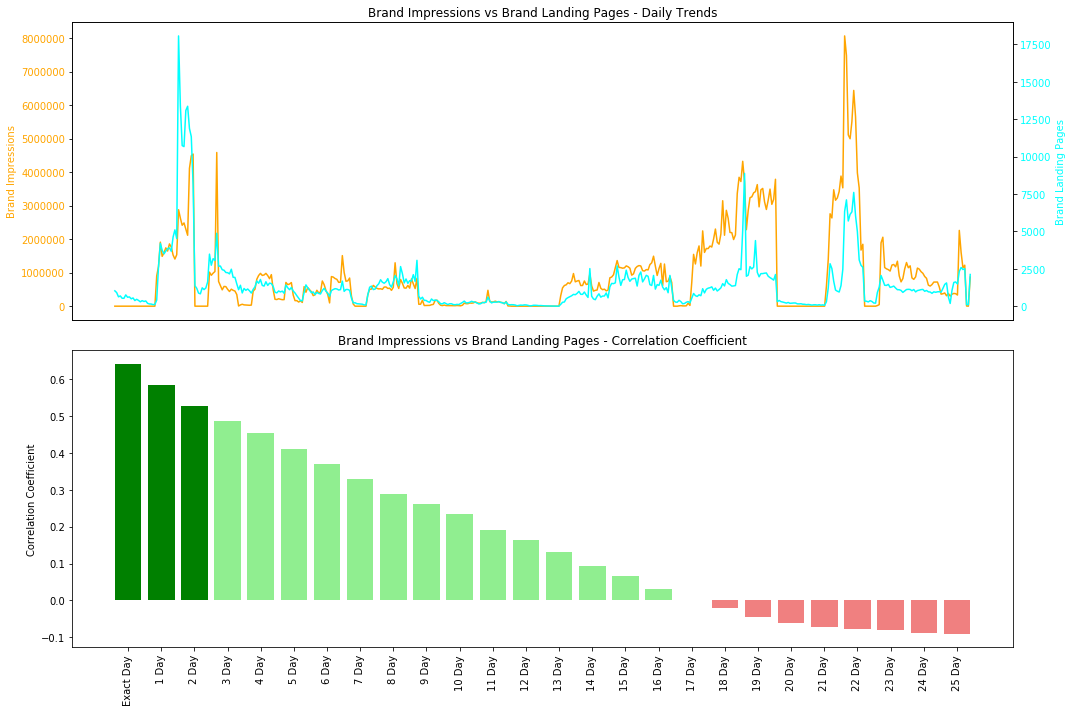

In [16]:
### VISUALIZE PART 1 (Brand Impressions vs Brand Landing Pages) ANALYSIS ###

trend_data = pd.read_csv('data for charts/Lag_time_python_TimeSeries.csv')

#set up numpy arrays for dual axis line chart (matplotlib)
Date = trend_data["Date"].values
Brand_Imp = trend_data["Brand_Imp"].values
Brand_LP = trend_data["Brand_LP"].values

#establish figure and axis (will add second axis)
fig, ax = plt.subplots(2, 1, figsize=[15,10])

#timeseries trends
plt.subplot(2,1, 1)
plt.title('Brand Impressions vs Brand Landing Pages - Daily Trends')
plt.ylabel('Brand Impressions', color='orange')
plt.plot(Date, Brand_Imp, color='orange')
plt.tick_params(axis='y', labelcolor='orange')
plt.tick_params(axis='x', labelbottom=False, bottom=False)

#add second axis
plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
plt2.set_ylabel('Brand Landing Pages', color='cyan')  # we already handled the x-label with ax1
plt2.plot(Date, Brand_LP, color='cyan')
plt2.tick_params(axis='y', labelcolor='cyan')

#convert correlation dictionary to dataframe (will only part 1 analysis for now)
brand_correl_df = pd.DataFrame(brand_correl, columns=brand_correl[0].keys())

#column names for x-axis labels & correlatoin coefficient values for y-axis values
B_vars = brand_correl_df["Analysis"].values
B_correl = brand_correl_df["Correl_Coef"].values

colors = []
for i in B_correl:
    if i > .5:
        colors.append('green')
    elif i < .5 and i > 0:
        colors.append('lightgreen')
    elif i < 0 and i > -.3:
        colors.append('lightcoral')
    elif i < -.3:
        colors.append('red')

#push out visualization for part 1 correlation (Brand Impressions vs Brand Landing Pages)
plt.subplot(2,1, 2)
plt.title('Brand Impressions vs Brand Landing Pages - Correlation Coefficient')
plt.bar(range(0, len(B_vars)), B_correl, color=colors, align='center')
plt.xticks(range(0, len(B_vars)), B_vars, rotation=90)
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

<a href='#top'>Top of Page</a>

<a id='sub14'></a>
<b>Part II - Model Visualizations (Brand Landing Pages vs Performance Conversions):</b>

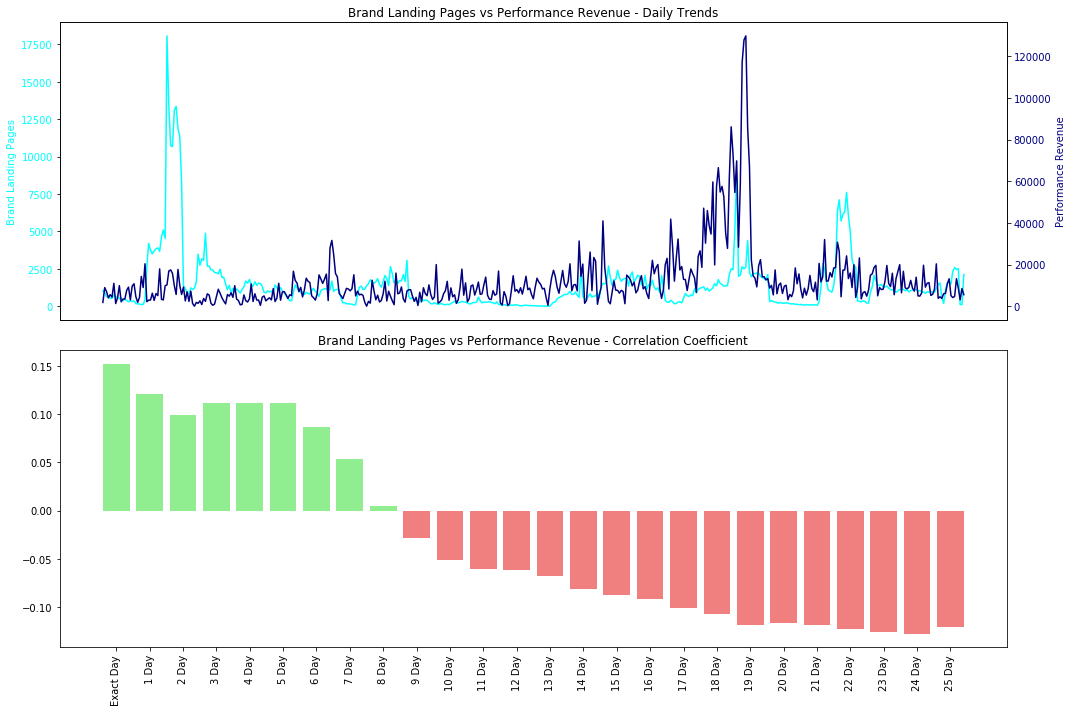

In [14]:
### VISUALIZE PART 2 (Brand Landing Pages vs Performance Revenue) ANALYSIS ###

#set up numpy arrays for dual axis line chart (matplotlib)
Date = trend_data["Date"].values
Brand_LP = trend_data["Brand_LP"].values
Perform_Rev = trend_data["Performance_Revenue"].values

#establish figure and axis (will add second axis)
fig, ax = plt.subplots(2, 1, figsize=[15,10])

#timeseries trends
plt.subplot(2,1, 1)
plt.title('Brand Landing Pages vs Performance Revenue - Daily Trends')
plt.ylabel('Brand Landing Pages', color='cyan')
plt.plot(Date, Brand_LP, color='cyan')
plt.tick_params(axis='y', labelcolor='cyan')
plt.tick_params(axis='x', labelbottom=False, bottom=False)

#add second axis
plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
plt2.set_ylabel('Performance Revenue', color='navy')  # we already handled the x-label with ax1
plt2.plot(Date, Perform_Rev, color='navy')
plt2.tick_params(axis='y', labelcolor='navy')

#column regex example below (pandas column search)
#Performance_Rev_Correl = correl_df[correl_df["Analysis"].str.contains('Brand LP vs ')]
per_correl_df = pd.DataFrame(perf_correl, columns=perf_correl[0].keys())
        
#column names for x-axis labels & correlatoin coefficient values for y-axis values
P_vars = per_correl_df["Analysis"].values
P_correl = per_correl_df["Correl_Coef"].values

colors = []
for i in P_correl:
    if i > .5:
        colors.append('green')
    elif i < .5 and i > 0:
        colors.append('lightgreen')
    elif i < 0 and i > -.3:
        colors.append('lightcoral')
    elif i < -.3:
        colors.append('red')

#push out visualization for part 2 correlation (Brand Landing Pages vs Performance Revenue)
plt.subplot(2,1, 2)
plt.title('Brand Landing Pages vs Performance Revenue - Correlation Coefficient')
plt.bar(range(0, len(P_vars)), P_correl, color=colors, align='center')
plt.xticks(range(0, len(P_vars)), P_vars, rotation=90)
plt.tight_layout()
plt.show()

<b>Lag time Insights:</b>
    <li></li>
    <li></li>
    
<a href='#top'>Top of Page</a>